In [14]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from plot_helpers import *
from experiment import *
default_rcParams()
%load_ext autoreload
%autoreload 3

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
base_folder = '/scratch/pp2681/NEMO-data/'
ds = {}
ds['R4'] = Experiment(base_folder+'EXPR4_100')
ds['R9'] = Experiment(base_folder+'EXPR9_100')
ds['R4_neg'] = Experiment(base_folder+'EXPR4_final_negvisc')

In [22]:
for key in os.listdir(base_folder+'Reynolds'):
    ds[key] = Experiment(base_folder+'Reynolds/'+key)

: 

: 

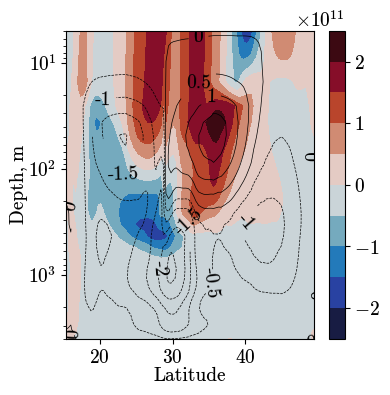

In [16]:
ds['R4_neg'].plot_MOC_heat()

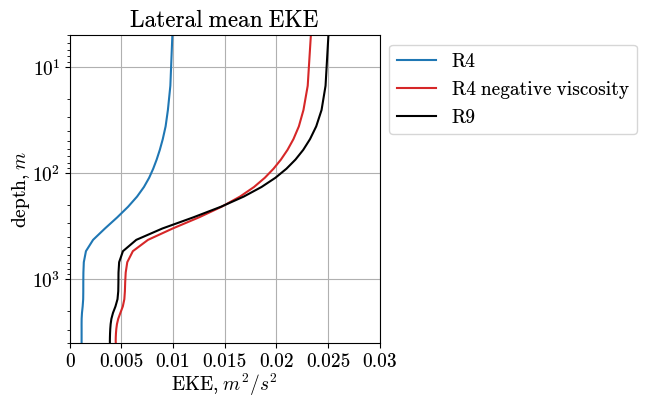

In [25]:
ds['R4'].plot_EKEz(label='R4')
ds['R4_neg'].plot_EKEz(label='R4 negative viscosity', color='tab:red')
ds['R9'].plot_EKEz(label='R9', color='k')
plt.legend(bbox_to_anchor=(1,1))

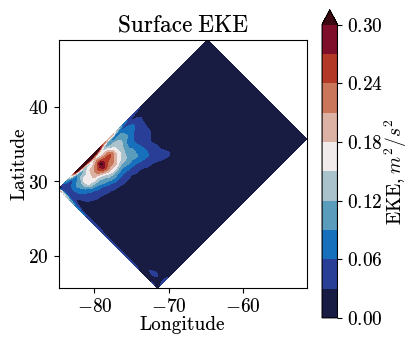

In [37]:
ds['R4_neg'].plot_EKE()
plt.savefig('EKE_neg.pdf')

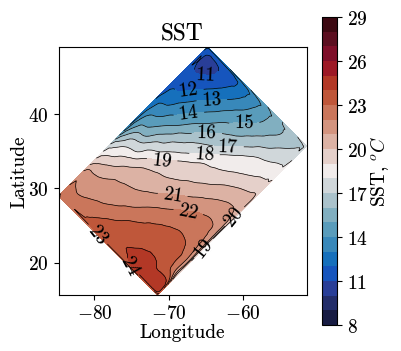

In [40]:
ds['R4_neg'].plot_SST()
plt.savefig('R4_neg_SST.pdf')

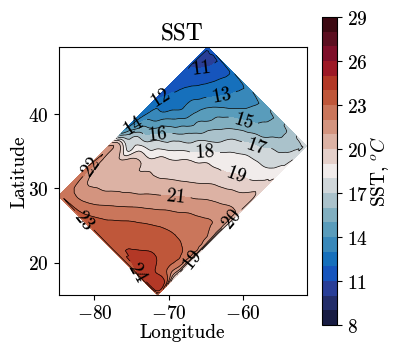

In [42]:
ds['R4'].plot_SST()
plt.savefig('R4_SST.pdf')